<a href="https://colab.research.google.com/github/khchoi-physik/pbh_simulations/blob/main/fem_test_peaks_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt

## 1D

[-0.47667321 -0.80378962 -0.52126339  0.48013087  2.88558987 -1.59042012
 -1.21161905  1.67148737 -1.12550315]
(array([4, 7]),)


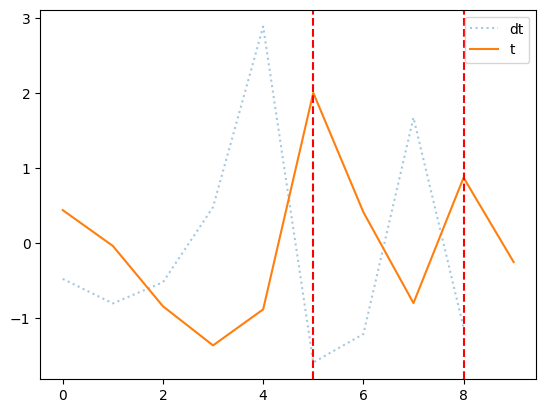

In [12]:
t= np.random.randn(10)
dt = t[1:] - t[:-1]
#print(t);
print(dt)
peaks = np.where(np.diff(np.sign(dt),axis=0)<0)
print(peaks)
peaks = peaks[0]

xrange = np.arange(len(t))
plt.plot(xrange[:-1],dt, label='dt', linestyle = ':', alpha=0.4)
plt.plot(xrange,t,label = 't')
for peak in peaks:
    plt.axvline(x=peak+1, nplor='r', linestyle='--')
    #plt.axvline(x=peak, nplor='b', linestyle=':')
plt.legend()

## 2D

In [138]:
# @title Method two using derivatives


mm=64
grf = np.random.randn(mm, mm)  # Replace with your actual grf array

grf= np.abs(grf)
cdx_grf = (grf[1: ,:] - grf[:-1, : ])
cdy_grf = (grf[:,1:] - grf[ :,:-1 ])

peaks_dx = np.where(np.diff(np.sign(cdx_grf),axis=0)<0)
peaks_dy = np.where(np.diff(np.sign(cdy_grf),axis=1)<0)

num_peaks_dx = len(peaks_dx[0])
num_peaks_dy = len(peaks_dy[0])

peaks_pos_x = np.array( [ [peaks_dx[0][n]+1,peaks_dx[1][n]] for n in range(num_peaks_dx)] )
peaks_pos_y = np.array( [ [peaks_dy[0][n],peaks_dy[1][n]+1] for n in range(num_peaks_dy)] )

peaks_set_x = set(map(tuple, peaks_pos_x))
peaks_set_y = set(map(tuple, peaks_pos_y))

peaks_2d_fem = peaks_set_y & peaks_set_x

print('Number of peaks found :', len(peaks_2d_fem))
print(peaks_2d_fem)

Number of peaks found : 795
{(49, 23), (15, 30), (26, 30), (26, 39), (19, 9), (11, 5), (21, 37), (44, 20), (41, 33), (33, 29), (4, 2), (10, 36), (25, 34), (2, 32), (10, 45), (2, 41), (37, 8), (33, 56), (56, 21), (14, 15), (37, 17), (22, 28), (25, 61), (43, 60), (56, 39), (46, 4), (57, 4), (14, 42), (55, 43), (26, 16), (36, 48), (59, 50), (15, 25), (17, 44), (47, 57), (48, 22), (59, 59), (18, 30), (9, 49), (7, 30), (29, 27), (8, 4), (48, 40), (41, 1), (48, 58), (21, 41), (6, 61), (10, 22), (33, 33), (44, 33), (52, 46), (33, 42), (10, 40), (14, 1), (34, 16), (45, 25), (34, 25), (3, 19), (14, 19), (26, 2), (38, 4), (49, 4), (55, 47), (18, 7), (59, 45), (55, 56), (36, 52), (28, 48), (29, 13), (47, 61), (48, 26), (44, 10), (6, 56), (25, 6), (62, 55), (10, 26), (25, 24), (53, 6), (2, 22), (45, 2), (34, 2), (56, 11), (45, 11), (3, 5), (51, 54), (55, 24), (24, 55), (15, 6), (28, 25), (48, 3), (18, 11), (5, 50), (40, 17), (48, 30), (21, 22), (6, 33), (60, 13), (41, 9), (52, 9), (60, 22), (62, 4

In [139]:
cdx_grf = np.diff(grf, axis=0)
cdy_grf = np.diff(grf, axis=1)

peaks_dx = np.where(np.diff(np.sign(cdx_grf),axis=0)<0)
peaks_dy = np.where(np.diff(np.sign(cdy_grf),axis=1)<0)

peaks_pos_x = np.stack([peaks_dx[0] + 1, peaks_dx[1]], axis=-1)
peaks_pos_y = np.stack([peaks_dy[0], peaks_dy[1] + 1], axis=-1)

peaks_set_x = set(map(tuple, peaks_pos_x))
peaks_set_y = set(map(tuple, peaks_pos_y))

peaks = peaks_set_y & peaks_set_x  # Use intersection for all three sets
print('Number of peaks found :', len(peaks))
print(peaks)

Number of peaks found : 795
{(49, 23), (15, 30), (26, 30), (26, 39), (19, 9), (11, 5), (21, 37), (44, 20), (41, 33), (33, 29), (4, 2), (10, 36), (25, 34), (2, 32), (10, 45), (2, 41), (37, 8), (33, 56), (56, 21), (14, 15), (37, 17), (22, 28), (25, 61), (43, 60), (56, 39), (46, 4), (57, 4), (14, 42), (55, 43), (26, 16), (36, 48), (59, 50), (15, 25), (17, 44), (47, 57), (48, 22), (59, 59), (18, 30), (9, 49), (7, 30), (29, 27), (8, 4), (48, 40), (41, 1), (48, 58), (21, 41), (6, 61), (10, 22), (33, 33), (44, 33), (52, 46), (33, 42), (10, 40), (14, 1), (34, 16), (45, 25), (34, 25), (3, 19), (14, 19), (26, 2), (38, 4), (49, 4), (55, 47), (18, 7), (59, 45), (55, 56), (36, 52), (28, 48), (29, 13), (47, 61), (48, 26), (44, 10), (6, 56), (25, 6), (62, 55), (10, 26), (25, 24), (53, 6), (2, 22), (45, 2), (34, 2), (56, 11), (45, 11), (3, 5), (51, 54), (55, 24), (24, 55), (15, 6), (28, 25), (48, 3), (18, 11), (5, 50), (40, 17), (48, 30), (21, 22), (6, 33), (60, 13), (41, 9), (52, 9), (60, 22), (62, 4

In [140]:
# @title Method two by counts

peaks_2d = []
for nn in range(len(peaks_pos_x)):

    x,y = peaks_pos_x[nn][0], peaks_pos_x[nn][1]

    if y > 0 and y < grf.shape[1]-1:
        # if  cdy_grf[x,y-1] > 0 and cdy_grf[x,y] < 0:
        #     peaks_2d.append( [x,y] )

        if  grf[x,y]- grf[x,y+1] > 0 and grf[x,y]- grf[x,y-1]  > 0:
            peaks_2d.append( [x,y] )

print('Number of peaks found :', len(peaks_2d))
print(peaks_2d)

Number of peaks found : 795
[[1, 2], [1, 7], [1, 11], [1, 19], [1, 21], [1, 24], [1, 28], [1, 31], [1, 33], [1, 35], [1, 43], [1, 45], [1, 50], [1, 52], [1, 54], [1, 57], [1, 59], [1, 61], [2, 9], [2, 15], [2, 22], [2, 32], [2, 37], [2, 41], [2, 58], [3, 5], [3, 11], [3, 13], [3, 16], [3, 19], [3, 25], [3, 29], [3, 36], [3, 40], [3, 50], [3, 52], [3, 56], [4, 2], [4, 4], [4, 8], [4, 12], [4, 22], [4, 26], [4, 32], [4, 34], [4, 38], [4, 43], [4, 45], [4, 47], [4, 49], [4, 54], [4, 57], [4, 59], [4, 62], [5, 5], [5, 10], [5, 15], [5, 20], [5, 23], [5, 27], [5, 30], [5, 37], [5, 39], [5, 50], [5, 58], [6, 4], [6, 8], [6, 12], [6, 17], [6, 21], [6, 33], [6, 35], [6, 45], [6, 51], [6, 56], [6, 61], [7, 1], [7, 6], [7, 14], [7, 30], [7, 32], [7, 41], [7, 43], [7, 48], [7, 53], [7, 59], [7, 62], [8, 4], [8, 8], [8, 11], [8, 15], [8, 19], [8, 23], [8, 34], [8, 37], [8, 39], [8, 44], [8, 50], [8, 54], [8, 57], [9, 7], [9, 10], [9, 12], [9, 18], [9, 21], [9, 27], [9, 29], [9, 38], [9, 41], [9, 4

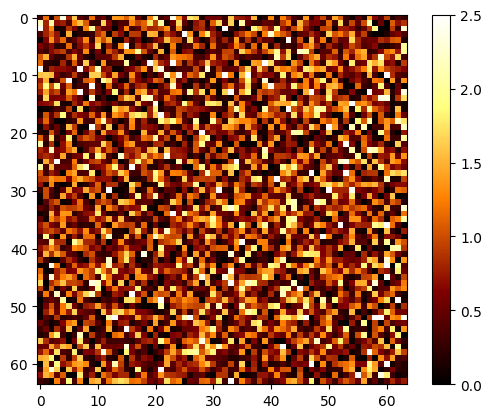

In [141]:
plt.imshow(grf, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

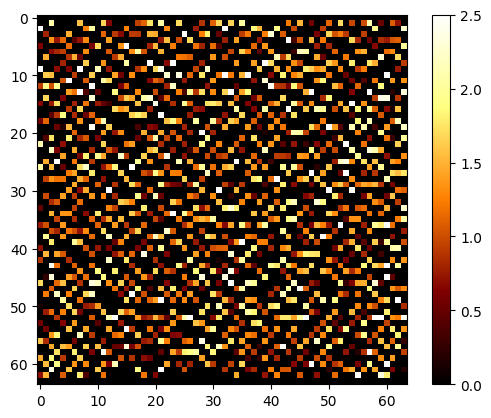

In [142]:
mask = np.zeros(grf.shape)

for (x,y) in peaks_pos_x:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

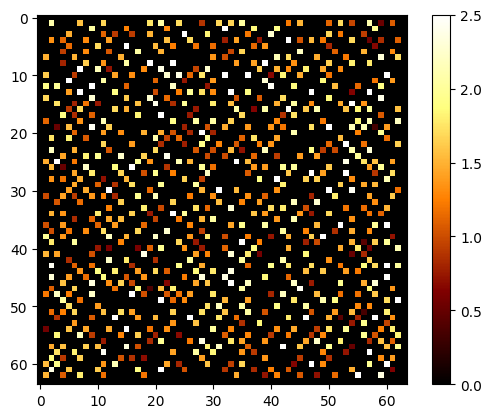

In [143]:
mask = np.zeros(grf.shape)

for (x,y) in peaks_2d:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

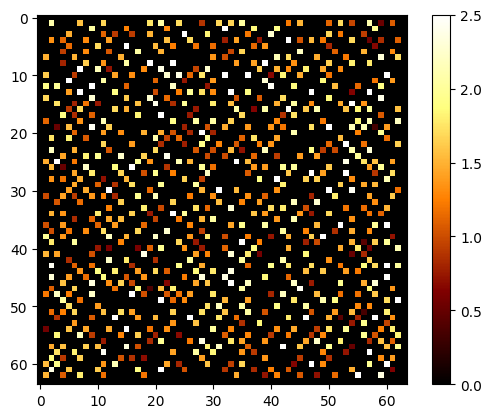

In [144]:
mask = np.zeros(grf.shape)

for (x,y) in peaks_2d_fem:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

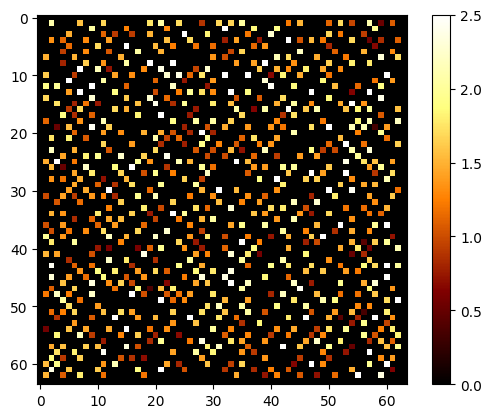

In [145]:
mask = np.zeros(grf.shape)

for (x,y) in peaks:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()